<a href="https://colab.research.google.com/github/denisecammarota/tesis-ib/blob/master/patchmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliary Code for the Models 

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

In [179]:
def initial_condition(N,n): #corregido a nro de personas
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  S[0] = N*0.5 - 1
  I[0] =  1
  S[1:-1] = np.random.uniform(0,N*0.5)
  S[-1] = N*0.5 - np.sum(S[1:-1])
  return S,I,R

In [180]:
def numbers_with_sum(n, k): #no necesito correccion a nro de personas
    """n numbers with sum k"""
    #https://stackoverflow.com/questions/58023361/generating-multiple-random-integer-number-with-fixed-sum-100-in-numpy-array (modified by me)
    if n == 1:
        return [k]
    if k == 0:
      num = 0
    elif k == 1:
      num = 1
    else:
      num = np.random.randint(1, k)
    return [num] + numbers_with_sum(n - 1, k - num)

In [181]:
def initial_condition_alt(N,n): #corregido a nro de personas
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  N_0 = numbers_with_sum(n,N)
  for i in range(n):
    if N_0[i] != 0:
      I[i] = np.random.randint(0,N_0[i])
      S[i] = N_0[i] - I[i]
    else:
      I[i] = 0
      S[i] = 0
  return S,I,R

In [182]:
def initial_condition_new(sus,inf,n): #corregido a nro de personas
  S = np.ones(n)*sus
  I = np.zeros(n)
  I[0] = inf
  R = np.zeros(n)
  return S,I,R

In [183]:
def matrices_sim(n,min,max): #no necesita correccion a nro de personas
  A = np.random.uniform(min,max,size=(n,n))
  A -= np.diag(np.diag(A))
  for i in range(n):
    for j in range(n):
      if j != i:
        A[i,i] -= A[i,j]
  return A

In [184]:
def matrices_sim_2(n,min,max): #no necesita correccion a nro de personas 
  A = np.random.uniform(min,max,size=(n,n))
  A = (A + A.T)/2 #symmetric matrix as result 
  A -= np.diag(np.diag(A))
  for i in range(n):
    A[i,i] = 0
    for j in range(n):
      if j != i:
        A[i,i] -= A[i,j]
  return A

In [185]:
def matrices_trivial(n): #no necesita correccion de nro de personas 
  A = np.zeros(shape=(n,n))
  return A

In [186]:
def SIR_model(y0,t,n,beta,gamma,A):
  X = y0[0:n]
  Y = y0[n:2*n]
  Z = y0[2*n:]
  N = X+Y+Z
  aux_X = np.zeros(n)
  aux_Y = np.zeros(n)
  aux_Z = np.zeros(n)
  for i in range(n):
    aux_X_2 = 0
    aux_Y_2 = 0
    aux_Z_2 = 0
    for j in range(n):
        aux_X_2 += A[i,j]*X[j]*(N[i]/N[j])
        aux_Y_2 += A[i,j]*Y[j]*(N[i]/N[j])
        aux_Z_2 += A[i,j]*Z[j]*(N[i]/N[j])
    aux_X[i] = aux_X_2
    aux_Y[i] = aux_Y_2
    aux_Z[i] = aux_Z_2
  dXdt = -beta*X*Y/N + (aux_X)
  dYdt = beta*X*Y/N - gamma*Y + (aux_Y)
  dZdt = gamma*Y + (aux_Z)
  return np.concatenate((dXdt,dYdt,dZdt))

In [187]:
def SIR_model_2(y0,t,n,beta,gamma,A,B):
  X = y0[0:n]
  Y = y0[n:2*n]
  Z = y0[2*n:]
  N = X+Y+Z
  dXdt = -beta*X*Y/N + N*(A@(X/N))
  dYdt = beta*X*Y/N - gamma*Y + N*(B@(Y/N))
  dZdt = gamma*Y + N*(A@(Z/N))
  return np.concatenate((dXdt,dYdt,dZdt))

In [188]:
#@title 
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [189]:
#@title 
def sign_custom(m):
  m_sign = np.sign(m)
  m_sign[m_sign == 0] = 1
  return m_sign

# SIR Model
In all models, I assume the following set of equations for each patch:

\begin{align}
\frac{dX_i}{dt} = -\frac{\beta X_{i} Y_{i}}{N_i} + \sum_{j} A_{ij} X_{j} \frac{N_i}{N_j} \\
\frac{dY_i}{dt} =  \frac{\beta X_{i} Y_{i}}{N_i} -\gamma Y_{i} + \sum_{j} B_{ij} Y_{j} \frac{N_i}{N_j} \\
\frac{dZ_i}{dt} = \gamma Y_{i} + \sum_{j} C_{ij} Z_{j} \frac{N_i}{N_j}\\
\end{align}

for $i=1,...,n$, assuming there are $n$ different patches.
For keeping the number of people constant, the following conditions are required:

\begin{align}
\sum_{j} A_{ji} = 0 \\
\sum_{j} B_{ji} = 0 \\
\sum_{j} C_{ji} = 0\\
\end{align}

For simplicity, I assumed that all matrices are equal, just to have less parameters. Later, a different matrix B could be introduced so that it gives less mobility to infected people. 

Main reference (used to construct the equations): https://www.sciencedirect.com/science/article/abs/pii/S0025556404000719?via%3Dihub

## Neutral Model
In all cases, the initial conditions are random, the matrix A (mobility) is not random in this case. Meaning, all that makes 'patches' different are actually only the initial conditions. These are important in the SIR model though, given that it can determine whether initially an epidemic outbreak dies out or not. 

Results for a= 1e-06


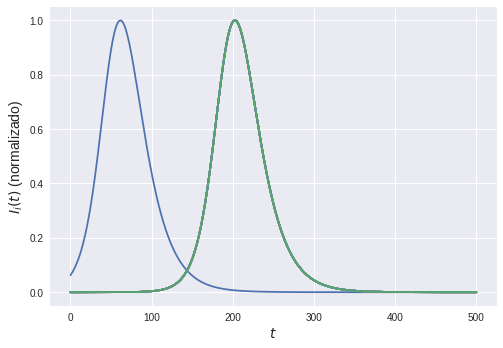

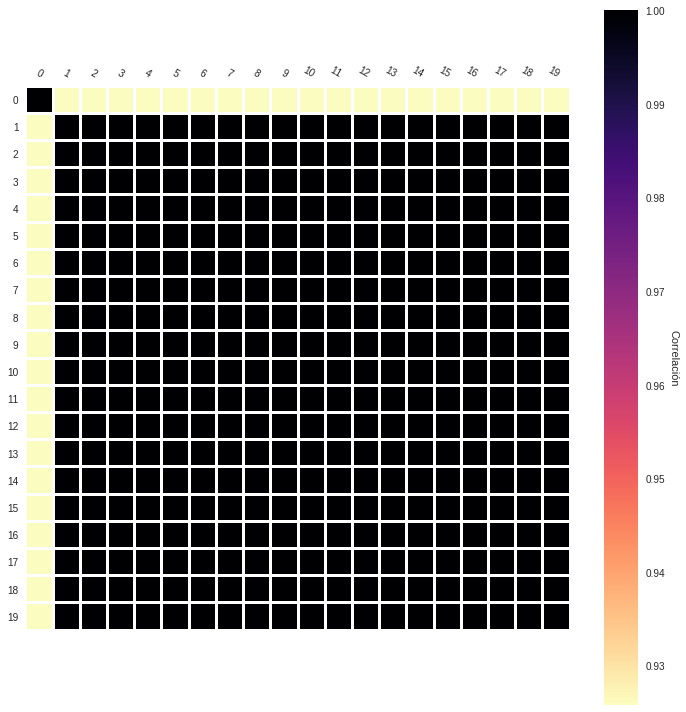

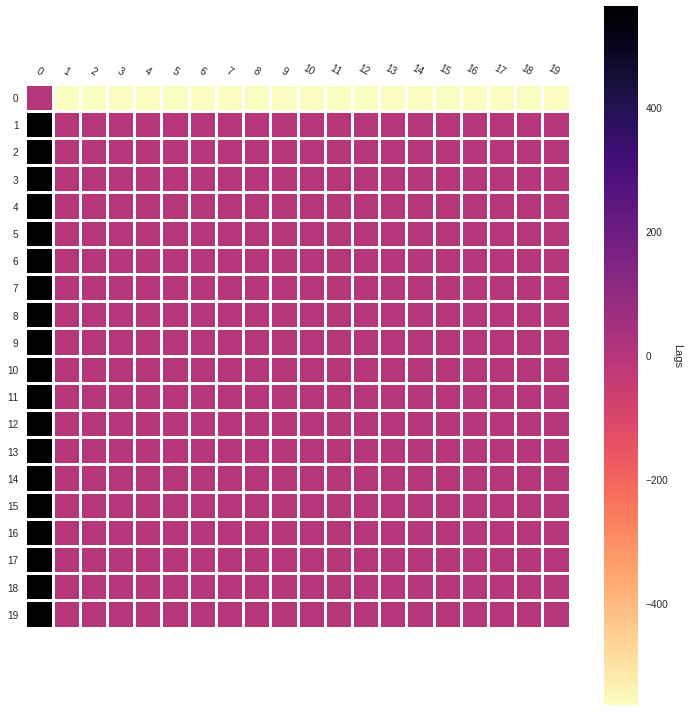

In [190]:
#@title 
min = np.array([0.000001])
for k in min:
  n = 20 #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S,I,R = initial_condition_new(sus,inf,n)
  A = matrices_sim(n,k,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_aux = np.copy(I)
  print('Results for a= '+str(k))
  for i in range(n):
    I_aux[:,i] = I_aux[:,i]/max(I_aux[:,i])
    plt.plot(t,I_aux[:,i])
  plt.ylabel(r'$I_i(t)$ (normalizado)',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.xlim((80,100))
  #plt.savefig('neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()


In [191]:
print(S+I+R)

[[1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 ...
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]]


## Non neutral Model
In all cases, the initial conditions are random, but the matrix A (mobility) is random in this case, thus making a 'non-neutral' model. The max vector has different values for different matrices A. For each value, the maximum values on the matrix will be between 0 and that value. For example, if max = 0.01, the elements of A will be random real numbers between 0 and max. 

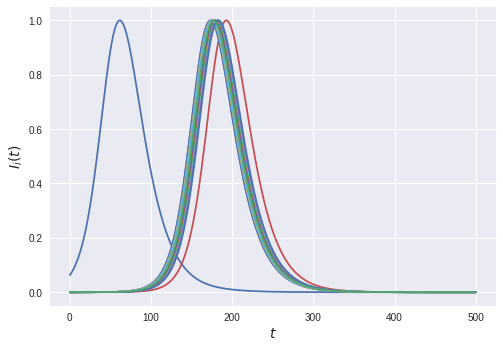

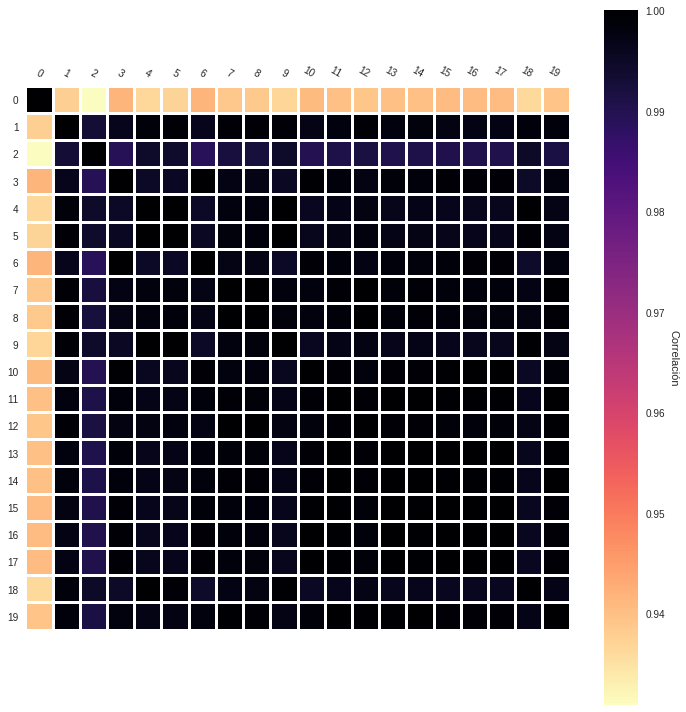

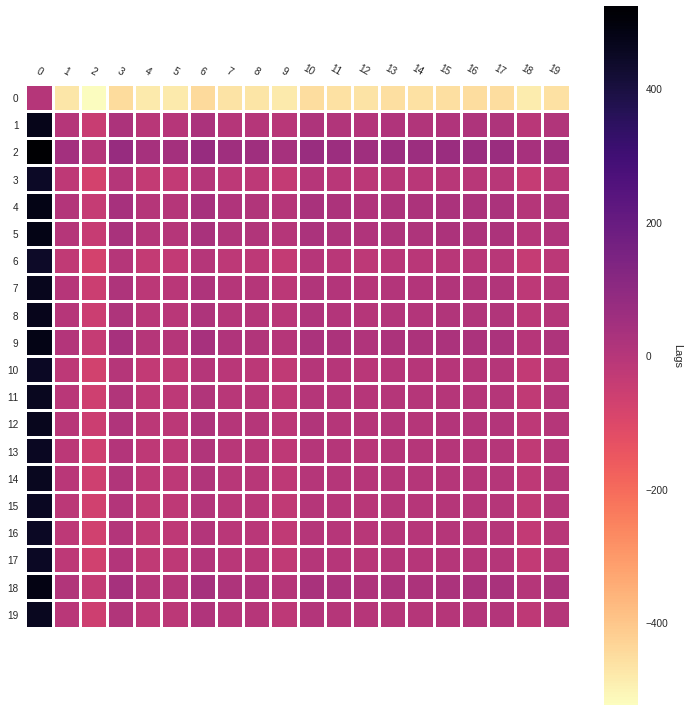

In [192]:
#@title 
#maximum = np.array([0.1,0.001,0.0005,0.00025,0.00001])
maximum = np.array([0.00001])
for k in maximum:
  n = 20 #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S,I,R = initial_condition_new(sus,inf,n)
  A = matrices_sim_2(n,0,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()


Grafico para el último las correlaciones, sin los valores de las autocorrelaciones, que son uno y que pueden distorsionarnos la escala de correlaciones. 

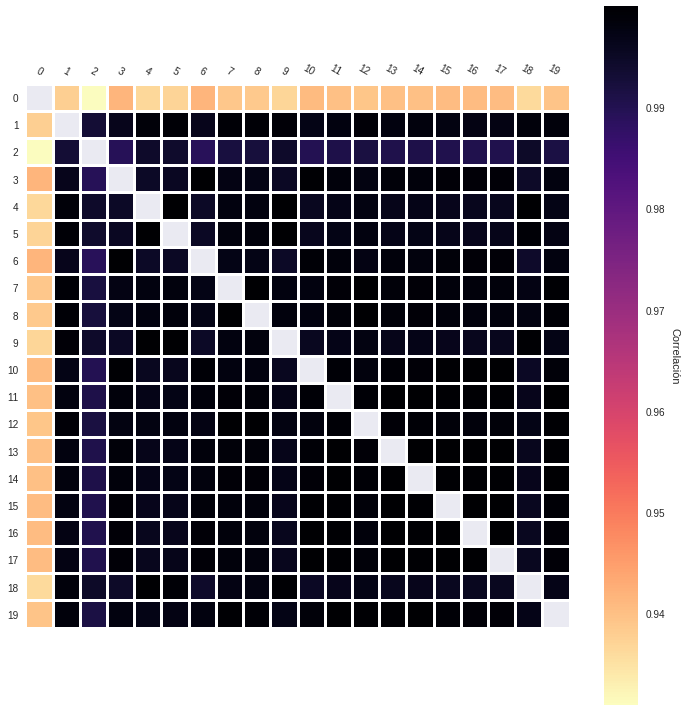

In [193]:
#@title 
np.fill_diagonal(max_correlations,np.nan)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

In [194]:
print(S+I+R)

[[1000000.06259251 1000000.         1000000.         ... 1000000.
  1000000.         1000000.        ]
 [ 999824.10226105  999999.98743052  999999.99501492 ...  999999.98218073
   999999.98997669  999999.98439343]
 [ 999645.17691571  999999.97441378  999999.98985225 ...  999999.96372754
   999999.97959664  999999.96823161]
 ...
 [1009999.97755532  999999.44020423  999999.05199457 ...  999999.54079989
   999999.36402997  999999.50477744]
 [1009999.97777605  999999.44609691  999999.06198064 ...  999999.54563131
   999999.37072648  999999.50998876]
 [1009999.97799462  999999.45192755  999999.07186151 ...  999999.55041189
   999999.37735247  999999.51514524]]


#Non Neutral: difference by population size only

Using the first case of the neutral matrix, different population sizes. 

In [195]:
#@title 
population = np.array([2890151,15625084,367828,3308876,992595,1055259,509108,1235994,530162,673309,318951,333642,1738929,
              1101593,551266,638645,1214441,681055,432310,273964,3194537,874006,127205,1448188])

Results for a= 0.0001


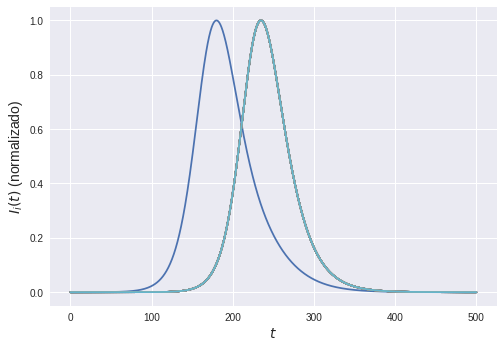

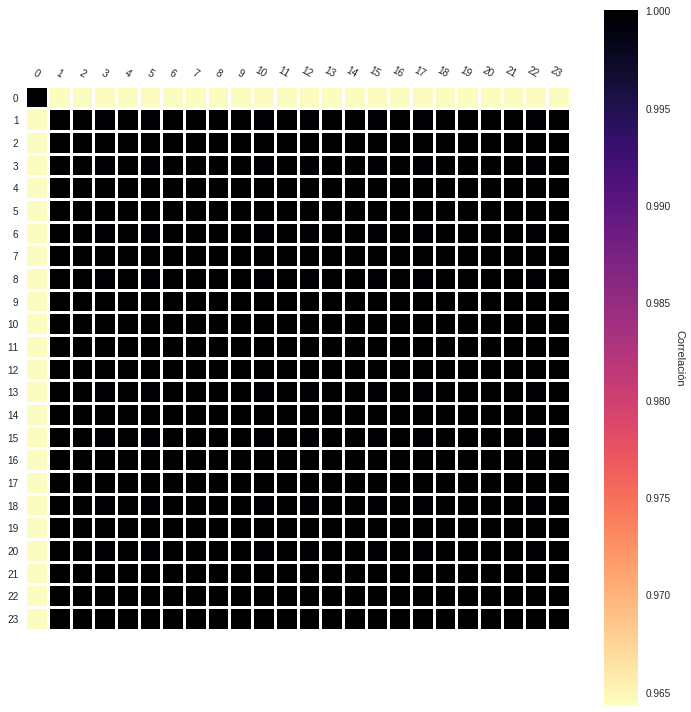

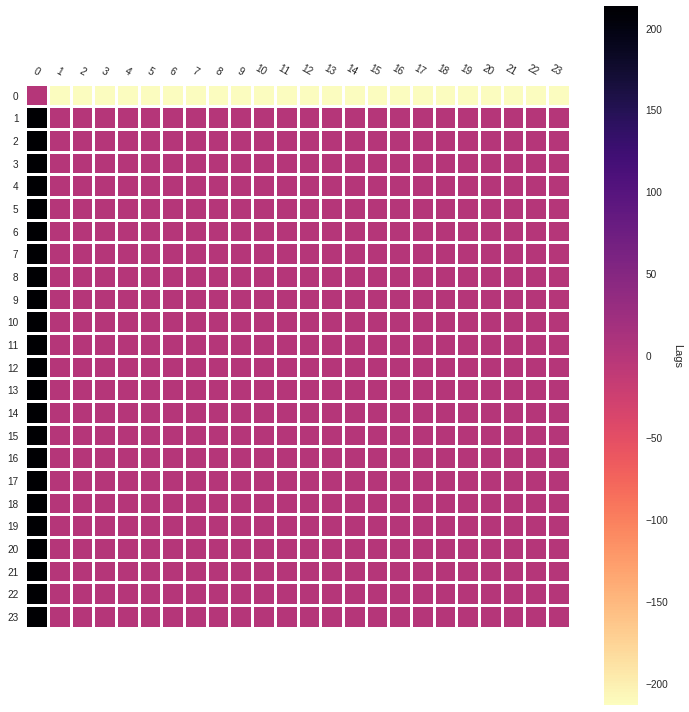

In [196]:
#@title 
min = np.array([0.0001])
for k in min:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 10
  R = np.zeros(n)
  A = matrices_sim(n,k,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_aux = np.copy(I)
  print('Results for a= '+str(k))
  for i in range(n):
    I_aux[:,i] = I_aux[:,i]/max(I_aux[:,i])
    plt.plot(t,I_aux[:,i])
  plt.ylabel(r'$I_i(t)$ (normalizado)',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.xlim((80,100))
  #plt.savefig('neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

#Non Neutral: difference by population size and using a random matrix

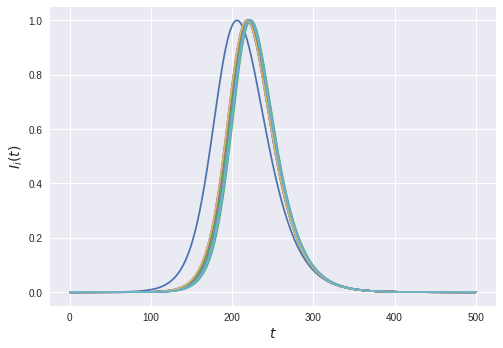

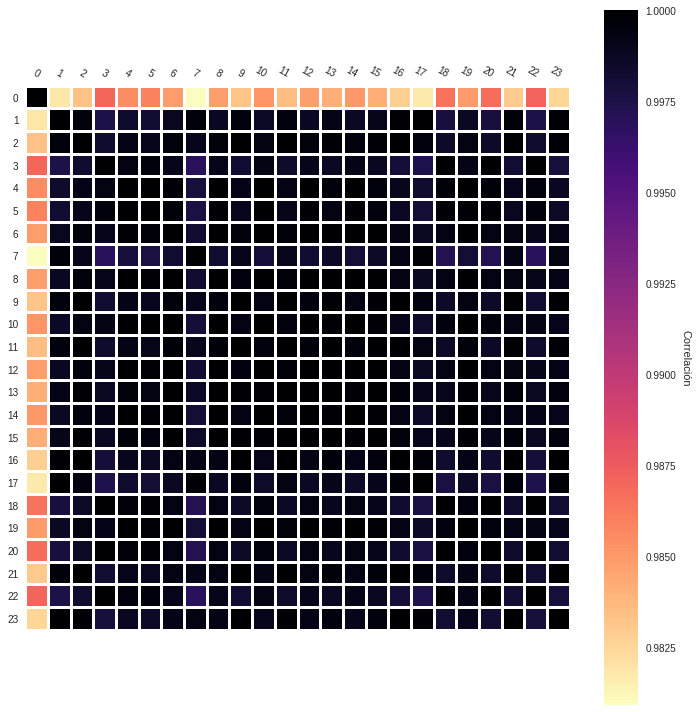

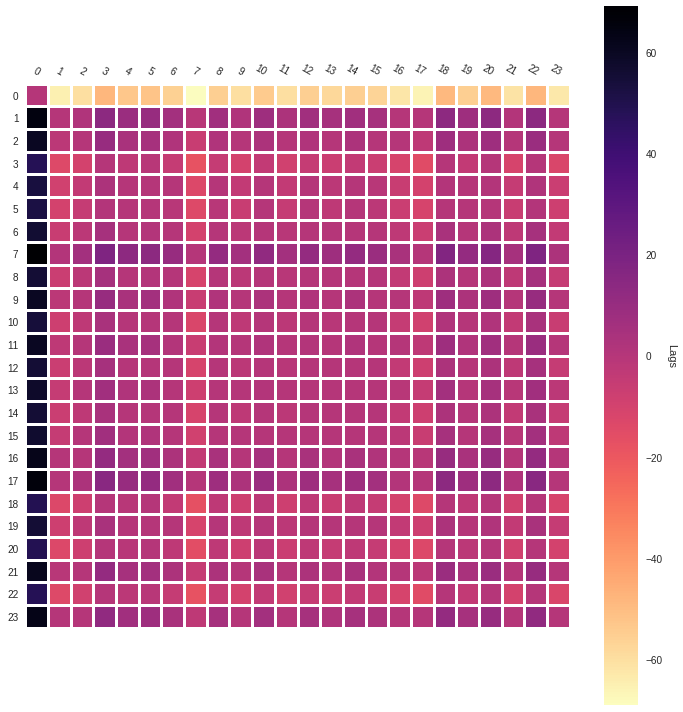

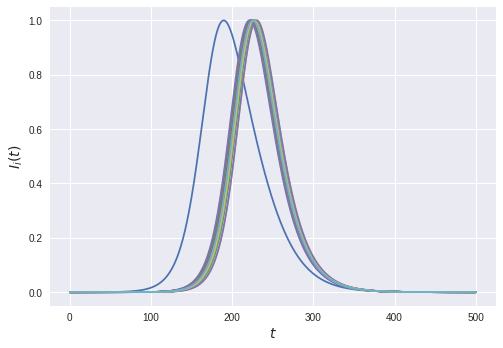

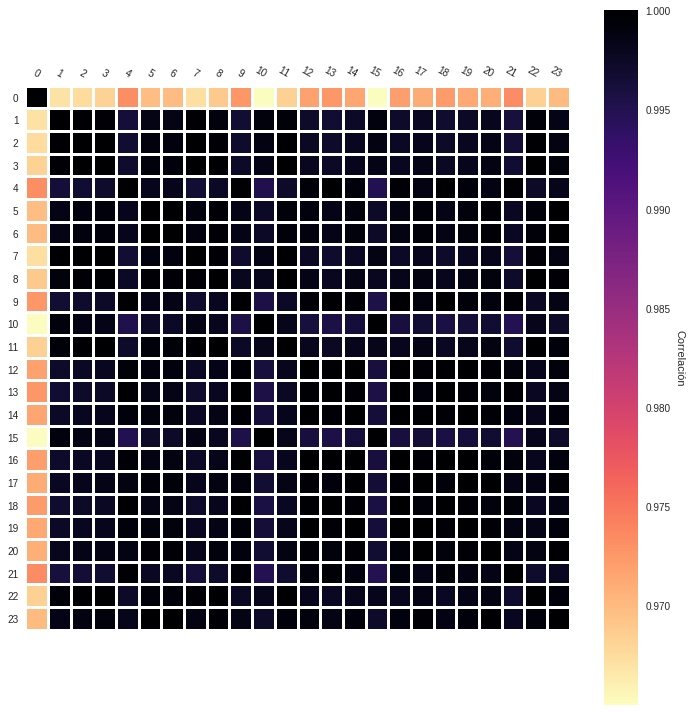

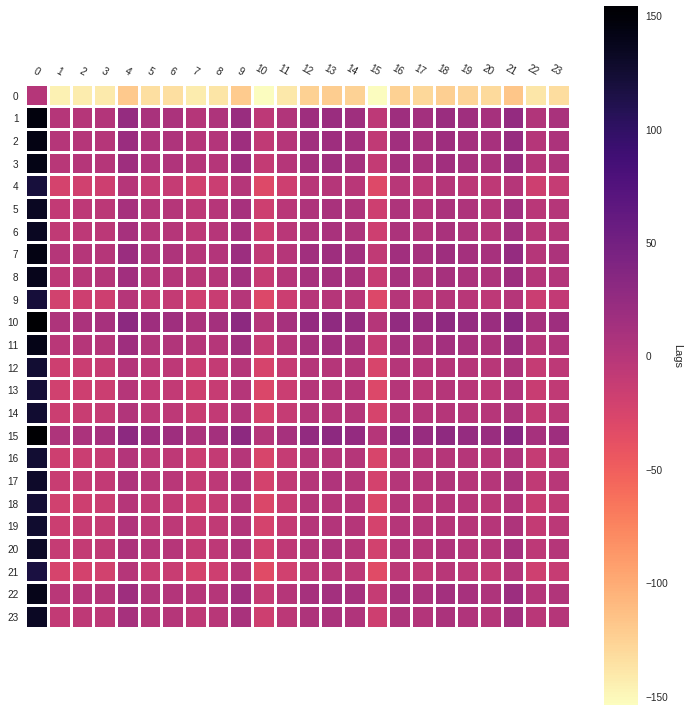

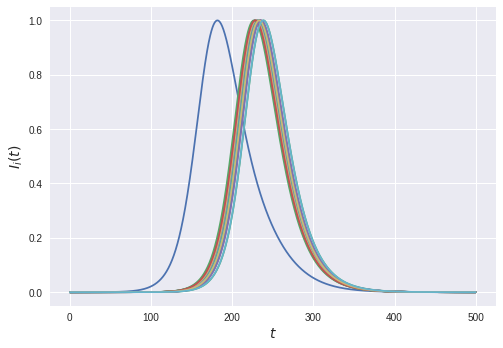

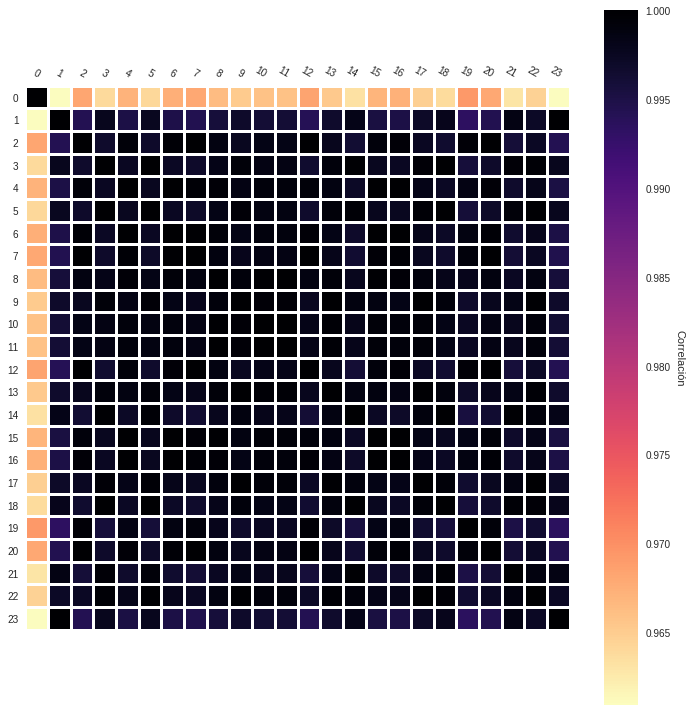

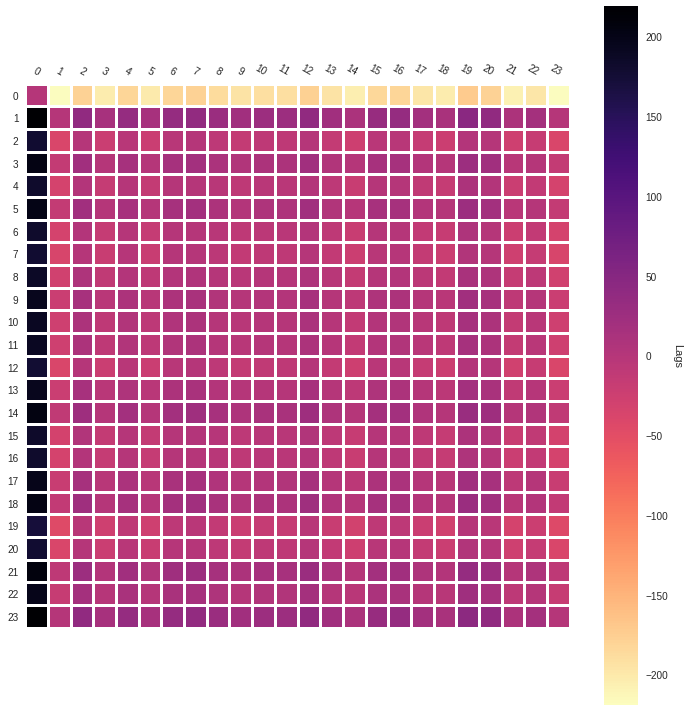

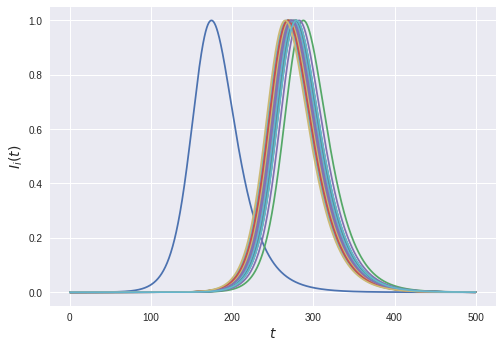

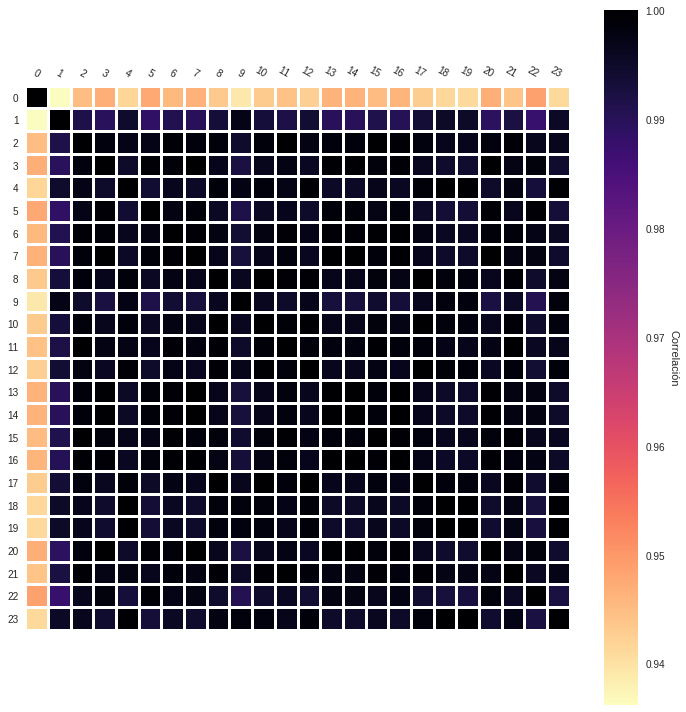

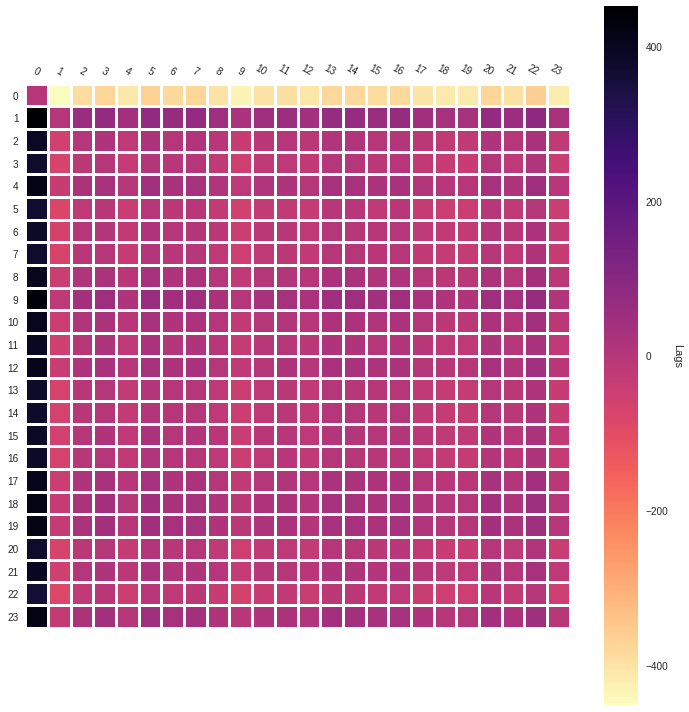

In [197]:
#@title 
maximum = np.array([0.001,0.0005,0.00025,0.00001])
for k in maximum:
  n = population.shape[0] #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 10
  R = np.zeros(n) 
  A = matrices_sim_2(n,0,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

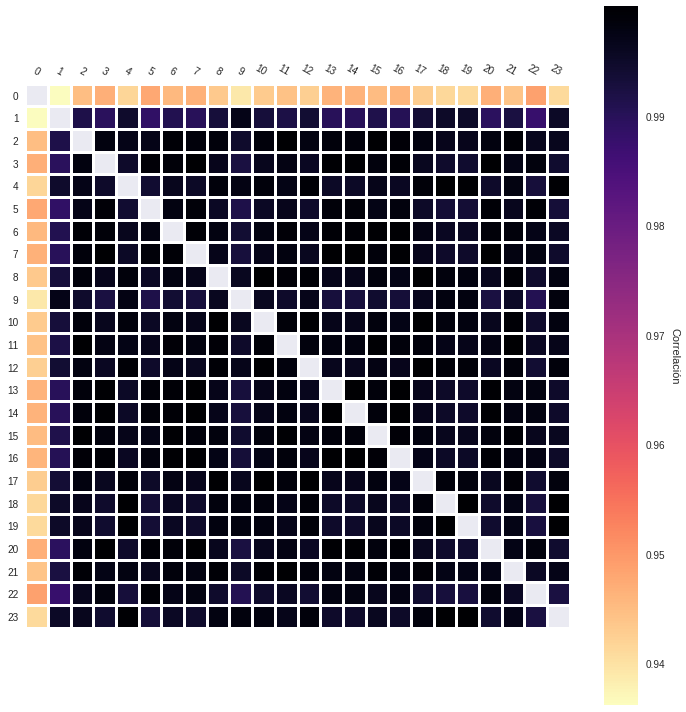

In [198]:
#@title 
np.fill_diagonal(max_correlations,np.nan)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

# Non Neutral: difference by population size and using a function to generate conectivity matrix

In [199]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.0001*(population[i]+population[j])/(pop_total)
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i!= j:
      A_new[i,i] -= A_new[i,j]

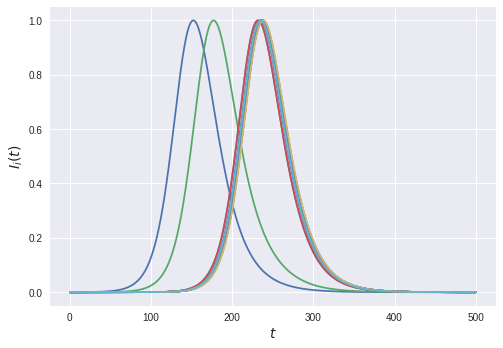

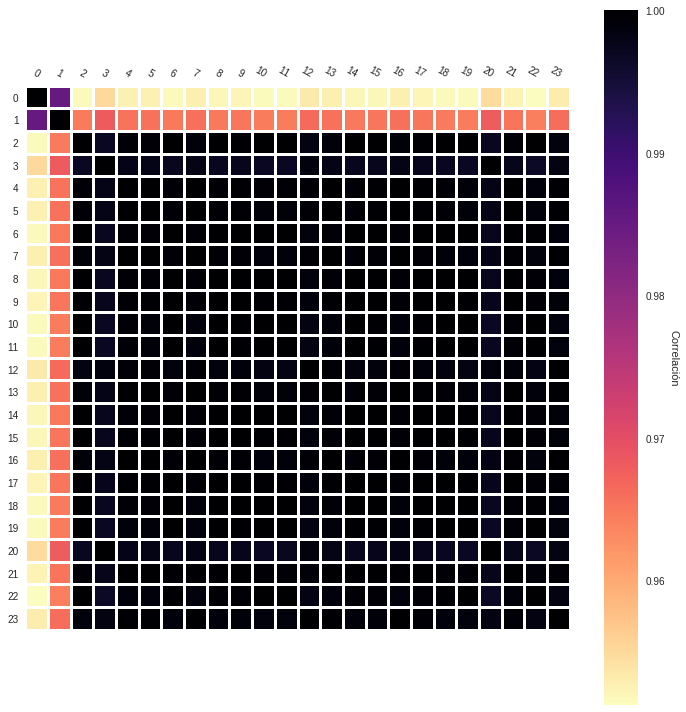

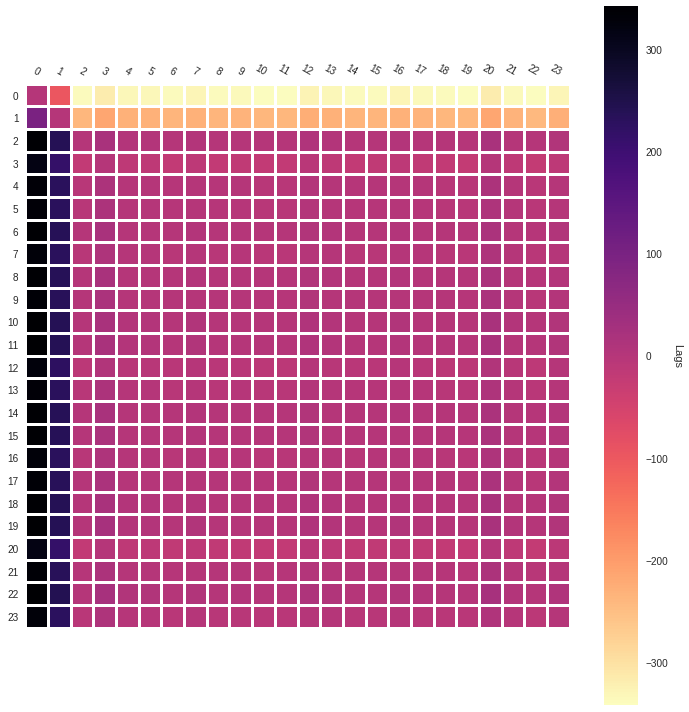

In [200]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 50
  I[1] = 50
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

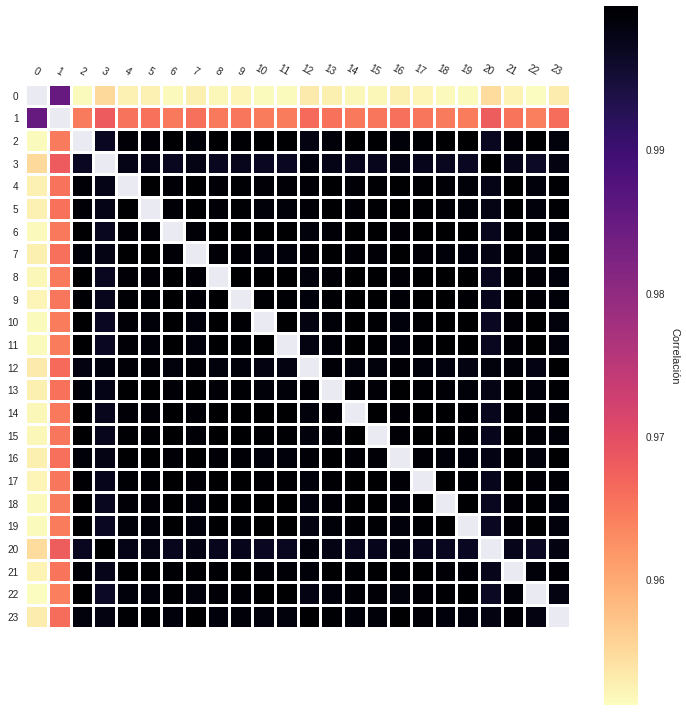

In [201]:
  np.fill_diagonal(max_correlations,np.nan)
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

# Last one with realistic initial conditions

In [208]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([57,59,0,7,3,17,1,4,0,1,0,1,2,0,2,6,0,0,1,3,4,0,3,2]) #pop infected at day 70 by provinces
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.0001*(population[i]+population[j])/(pop_total)
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

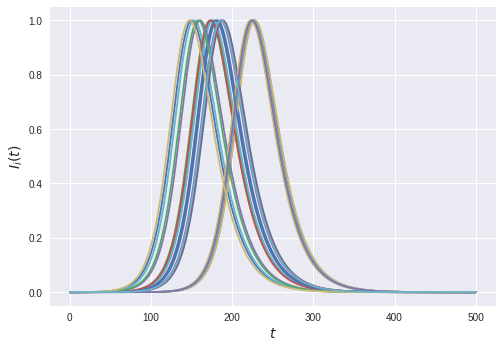

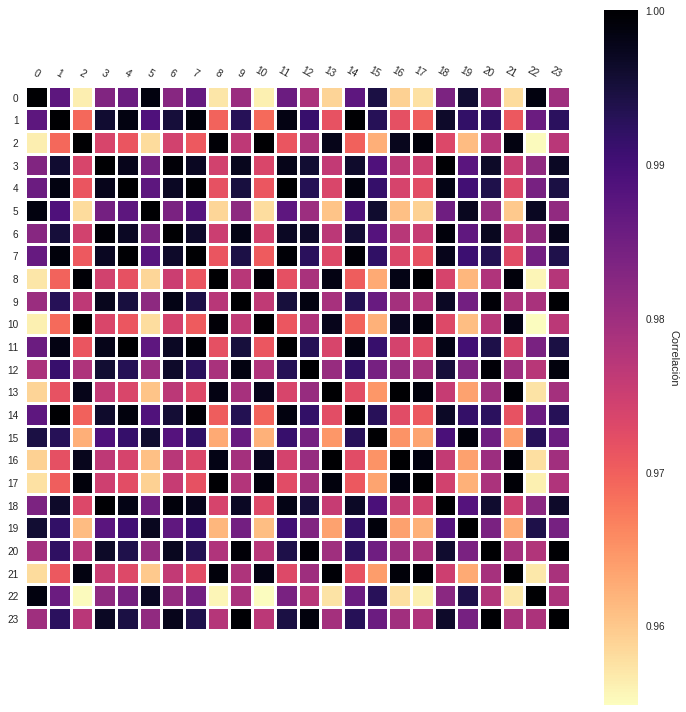

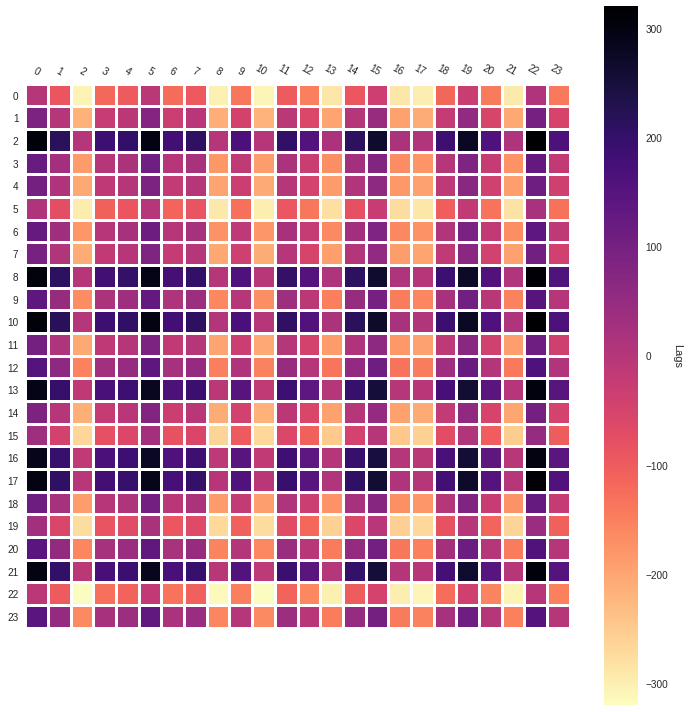

In [209]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_max = np.zeros(shape=I.shape)
  for i in range(n):
    I_max[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I_max[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

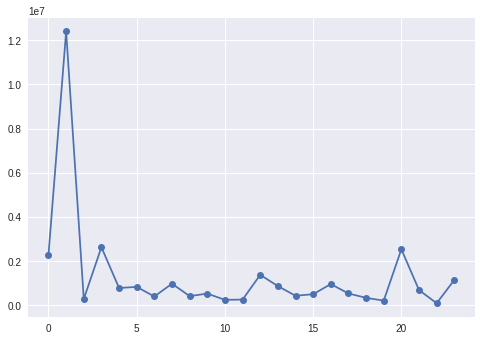

In [237]:
inf_total = []
for i in range(24):
  inf_total.append(S[0,i]-S[-1,i])
plt.plot(range(24),inf_total,'-o')

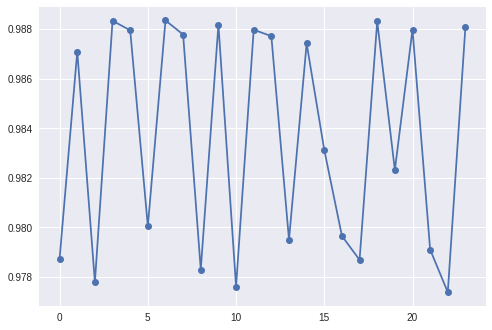

In [240]:
plt.plot(np.mean(max_correlations,axis=0),'-o')

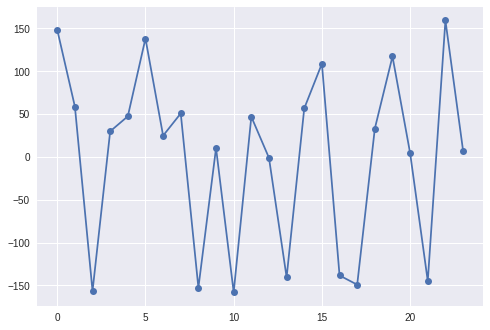

In [241]:
plt.plot(np.mean(max_lags,axis=0),'-o')

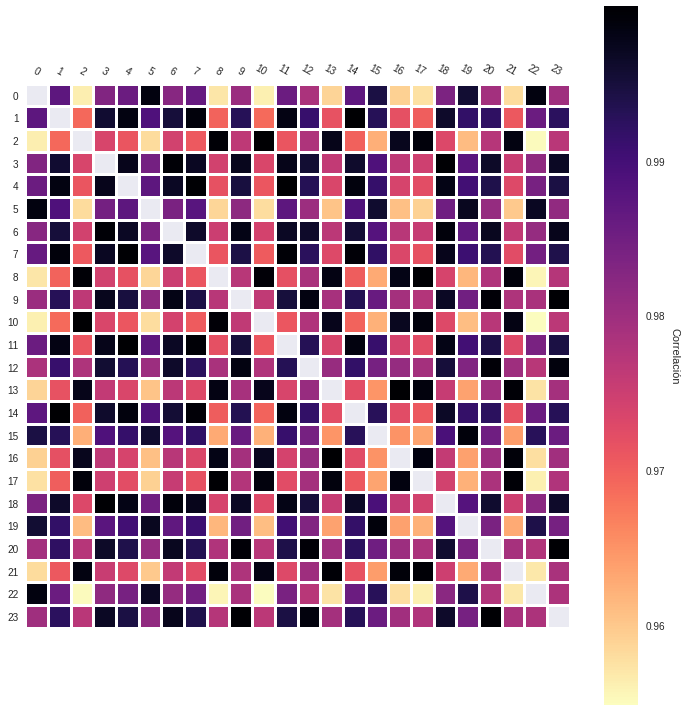

In [205]:
  np.fill_diagonal(max_correlations,np.nan)
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

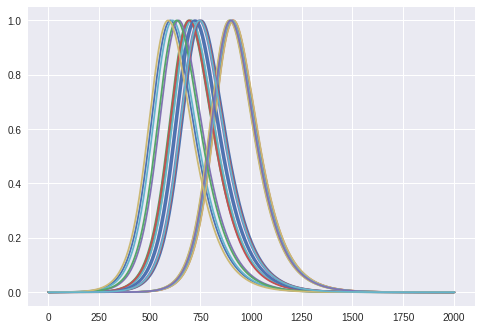

In [206]:
plt.plot(I)